# Metric #2 Number of Citations Per Neighborhood

**Analyzed by Valerie Schaible**

Citations in Pittsburgh are low level crimes, including harrasment, disorderly conduct, and more, in which law enforcement opts to issue a citation or fine instead of arresting the perpetartor. This datasets contains all the non-traffic citations in Pittsburgh. We are including these citations as a metric because even though they are not on the same level as the police incidents, they can definitely contribute to a lack of personal saefty in any given neighborhood.

In [1]:
import geopandas as gpd
import pandas as pd

# Load in the citations
citations= gpd.read_file('Citations.csv')

citations.head(3)

,PK,CCR,GENDER,RACE,AGE,CITEDTIME,INCIDENTLOCATION,OFFENSES,NEIGHBORHOOD,ZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y,geometry
0,1078081,16157849,M,B,29,2016-08-22T23:45:00,"200 Block N DITHRIDGE ST PITTSBURGH, PA",5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE N...,North Oakland,4,507,8,3,-79.95169208,40.44931132,None
1,1078082,16157849,M,W,21,2016-08-22T23:45:00,"200 Block N DITHRIDGE ST PITTSBURGH, PA",5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE N...,North Oakland,4,507,8,3,-79.95169208,40.44931132,None
2,1078083,16159579,,,,2016-08-25T11:10:00,"NORTH PARK PITTSBURGH, PA",5505 Public Drunkenness,Allegheny Center,1,2204,,,,,None


We can see that the dataset provides a description of the offense, with examples such as disorderly conduct the includes the destrcution of another's property, public drunkeness, and scattering dangerous waste into public spaces and waters. The dataset doesn't have a set hierarchy, but we can classify certain citations as "most likely to cause harm to other inviduals."

The first severe citation we can analyze is the offense labelled : "5503(a)(4) DISORDERLY CONDUCT-HAZARDOUS/PHYS.OFF"

In [4]:
hazards=gpd.read_file('Citations.csv')
#sort dataset to only include citations with this offense
hazards=hazards[hazards["OFFENSES"] == "5503(a)(4) DISORDERLY CONDUCT - HAZARDOUS/PHYS. OFF"]

hazards.head(3)

,PK,CCR,GENDER,RACE,AGE,CITEDTIME,INCIDENTLOCATION,OFFENSES,NEIGHBORHOOD,ZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y,geometry
15,1078043,16048495,M,W,27,2016-03-18T00:50:00,"1500 Block E CARSON ST PITTSBURGH, PA",5503(a)(4) DISORDERLY CONDUCT - HAZARDOUS/PHYS...,South Side Flats,3,1702,3,3,-79.98330671,40.42868483,None
23,1078051,16053250,F,B,26,2016-03-25T01:55:00,"WEST LIBERTY AV & PIONEER AV PITTSBURGH, PA",5503(a)(4) DISORDERLY CONDUCT - HAZARDOUS/PHYS...,Brookline,6,1917,4,5,-80.01011991,40.41291213,None
64,1077859,16148744,M,W,45,2016-08-10T03:30:00,"7TH STREET BRIDGE PITTSBURGH, PA",5503(a)(4) DISORDERLY CONDUCT - HAZARDOUS/PHYS...,Golden Triangle/Civic Arena,2,201,2,5,-80.05910627,40.42937714,None


Now we can determine which neighborhoods have the highest numbers of this specific citation.

In [6]:
temp = pd.DataFrame(columns = ["Neighborhood" ,"Number of 5503(a)(4) Offenses"])
temp["Neighborhood"] = hazards["NEIGHBORHOOD"]
temp["Number of 5503(a)(4) Offenses"]=0

temp.head(3)


,Neighborhood,Number of 5503(a)(4) Offenses
15,South Side Flats,0
23,Brookline,0
64,Golden Triangle/Civic Arena,0


In [10]:
temp_agg = pd.DataFrame(columns = ["Neighborhood", "Number of 5503(a)(4) Offenses"])
for i, row in temp.iterrows():
    neighborhood = row["Neighborhood"]
 # Check to see if the neighborhood is already been acremented
        #If so, increment the number of citations in that neighborhood
    if neighborhood in temp_agg["Neighborhood"].values:
            temp_agg.loc[temp_agg["Neighborhood"] == neighborhood, "Number of 5503(a)(4) Offenses"] += 1
    else:
        # If not, add a new row to the aggregated DataFrame
            agg_new_row = pd.DataFrame({ 'Neighborhood': [neighborhood], 'Number of 5503(a)(4) Offenses': [1] })
            temp_agg = pd.concat([temp_agg, agg_new_row])
temp_agg.head(3)

,Neighborhood,Number of 5503(a)(4) Offenses
0,South Side Flats,146
0,Brookline,18
0,Golden Triangle/Civic Arena,2


In [11]:
temp_agg_sorted= temp_agg.sort_values("Number of 5503(a)(4) Offenses", ascending=False)
temp_agg_sorted.head(5)

,Neighborhood,Number of 5503(a)(4) Offenses
0,South Side Flats,146
0,Central Business District,100
0,North Shore,51
0,Central Oakland,34
0,Shadyside,28


We can see that South Side Flats has the highest number of occurences of this specific citation. Lets plot the top ten neighborhoods.

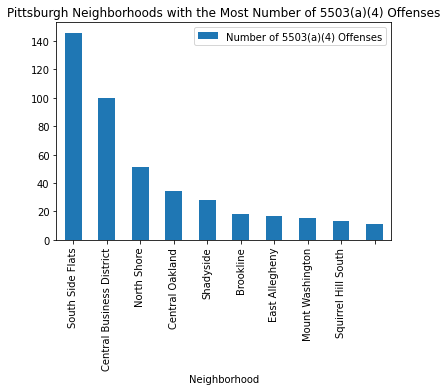

In [12]:
plt = temp_agg_sorted.iloc[:10].plot(kind='bar', x="Neighborhood", y="Number of 5503(a)(4) Offenses", title="Pittsburgh Neighborhoods with the Most Number of 5503(a)(4) Offenses")

Lets also plot the neighborhoods with the least number of occurences of this offense.

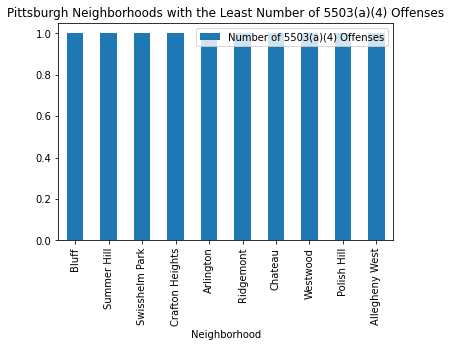

In [14]:
temp_agg_sorted_opp=temp_agg.sort_values("Number of 5503(a)(4) Offenses", ascending=True)
plt = temp_agg_sorted_opp.iloc[:10].plot(kind='bar', x="Neighborhood", y="Number of 5503(a)(4) Offenses", title="Pittsburgh Neighborhoods with the Least Number of 5503(a)(4) Offenses")

Lets repeat this process with the next severe offense.

In [16]:
mischief=gpd.read_file('Citations.csv')
#sort dataset to only include citations with this offense
mischief=mischief[mischief["OFFENSES"] == "3304(a)(5) CRIMINAL MISCHIEF - Intentionally Damages Real Or Personal Property Of Another"]

mischief.head(3)


,PK,CCR,GENDER,RACE,AGE,CITEDTIME,INCIDENTLOCATION,OFFENSES,NEIGHBORHOOD,ZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y,geometry
9,1078090,16077700,M,B,24,2016-04-29T01:05:00,"80 Block S 15TH ST PITTSBURGH, PA",3304(a)(5) CRIMINAL MISCHIEF - Intentionally D...,South Side Flats,3,1702,3,3,-79.98357299,40.4285553,None
50,1077845,16154922,M,W,58,2016-08-18T20:05:00,"200 Block S FAIRMOUNT ST PITTSBURGH, PA",3304(a)(5) CRIMINAL MISCHIEF - Intentionally D...,Friendship,5,807,7,2,-79.93380359,40.46232738,None
59,1077854,16153732,F,B,27,2016-08-17T06:08:00,"2400 Block PARK HILL DR PITTSBURGH, PA",3304(a)(5) CRIMINAL MISCHIEF - Intentionally D...,East Hills,5,1306,9,2,-79.87380288,40.45582712,None


In [19]:
temp2 = pd.DataFrame(columns = ["Neighborhood" ,"Number of Mischief Offenses"])
temp2["Neighborhood"] = mischief["NEIGHBORHOOD"]
temp2["Number of Mischief Offenses"]=0

temp2.head(3)

,Neighborhood,Number of Mischief Offenses
9,South Side Flats,0
50,Friendship,0
59,East Hills,0


In [20]:
temp2_agg = pd.DataFrame(columns = ["Neighborhood", "Number of Mischief Offenses"])
for i, row in temp2.iterrows():
    neighborhood = row["Neighborhood"]
 # Check to see if the neighborhood is already been acremented
        #If so, increment the number of citations in that neighborhood
    if neighborhood in temp2_agg["Neighborhood"].values:
            temp2_agg.loc[temp2_agg["Neighborhood"] == neighborhood, "Number of Mischief Offenses"] += 1
    else:
        # If not, add a new row to the aggregated DataFrame
            agg_new_row = pd.DataFrame({ 'Neighborhood': [neighborhood], 'Number of Mischief Offenses': [1] })
            temp2_agg = pd.concat([temp2_agg, agg_new_row])
temp2_agg.head(3)

,Neighborhood,Number of Mischief Offenses
0,South Side Flats,44
0,Friendship,1
0,East Hills,8


In [21]:
temp2_agg_sorted= temp2_agg.sort_values("Number of Mischief Offenses", ascending=False)
temp2_agg_sorted.head(5)

,Neighborhood,Number of Mischief Offenses
0,South Side Flats,44
0,Central Business District,32
0,Carrick,25
0,Hazelwood,21
0,Knoxville,15


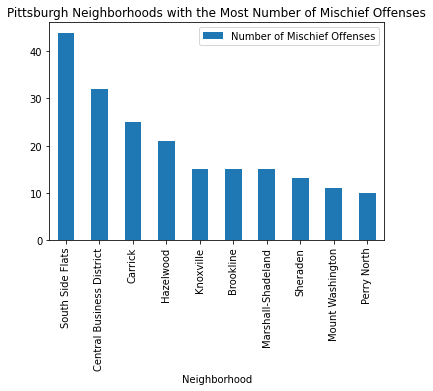

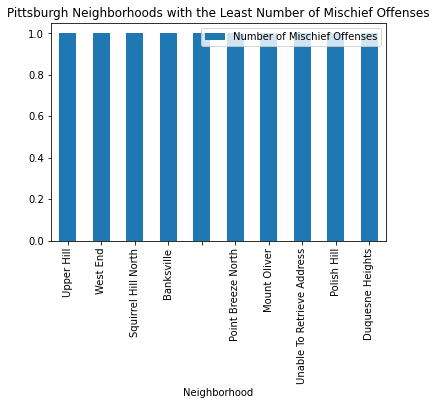

In [22]:
plt = temp2_agg_sorted.iloc[:10].plot(kind='bar', x="Neighborhood", y="Number of Mischief Offenses", title="Pittsburgh Neighborhoods with the Most Number of Mischief Offenses")
temp2_agg_sorted_opp=temp2_agg.sort_values("Number of Mischief Offenses", ascending=True)
plt = temp2_agg_sorted_opp.iloc[:10].plot(kind='bar', x="Neighborhood", y="Number of Mischief Offenses", title="Pittsburgh Neighborhoods with the Least Number of Mischief Offenses")

We can see that South Side Flats has the highest number of occurences of the criminal mischief citation, while the bottom ten neighborhood all have only one instance of this offense.

Finally, lets do this process one more time for the citation that is harrassment by threats or physicality.

In [26]:
threats=gpd.read_file('Citations.csv')
#sort dataset to only include citations with this offense
threats=threats[threats["OFFENSES"] == "2709(a)(1) Harassment by Physical Contact, or Attempts or Threats"]

threats.head(3)

,PK,CCR,GENDER,RACE,AGE,CITEDTIME,INCIDENTLOCATION,OFFENSES,NEIGHBORHOOD,ZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y,geometry
51,1077846,16149855,F,B,30,2016-08-10T11:00:00,"300 Block CLOVER ST PITTSBURGH, PA","2709(a)(1) Harassment by Physical Contact, or ...",Arlington,3,1603,3,3,-79.97202395,40.41473751,None
69,1077864,16128942,M,W,51,2016-07-11T21:10:00,"1900 Block E CARSON ST PITTSBURGH, PA","2709(a)(1) Harassment by Physical Contact, or ...",South Side Flats,3,1702,3,3,-79.97896499,40.42846581,None
140,1078134,16167457,F,B,25,2016-09-05T16:25:00,"NORTH SHORE DR & ART ROONEY AV PITTSBURGH, PA","2709(a)(1) Harassment by Physical Contact, or ...",North Shore,1,2205,1,6,-80.01355472,40.44529938,None


In [27]:
temp3 = pd.DataFrame(columns = ["Neighborhood" ,"Number of Harassment/Physical Offenses"])
temp3["Neighborhood"] = threats["NEIGHBORHOOD"]
temp3["Number of Harassment/Physical Offenses"]=0

temp3.head(3)

,Neighborhood,Number of Harassment/Physical Offenses
51,Arlington,0
69,South Side Flats,0
140,North Shore,0


In [28]:
temp3_agg = pd.DataFrame(columns = ["Neighborhood", "Number of Harassment/Physical Offenses"])
for i, row in temp3.iterrows():
    neighborhood = row["Neighborhood"]
 # Check to see if the neighborhood is already been acremented
        #If so, increment the number of citations in that neighborhood
    if neighborhood in temp3_agg["Neighborhood"].values:
            temp3_agg.loc[temp3_agg["Neighborhood"] == neighborhood, "Number of Harassment/Physical Offenses"] += 1
    else:
        # If not, add a new row to the aggregated DataFrame
            agg_new_row = pd.DataFrame({ 'Neighborhood': [neighborhood], 'Number of Harassment/Physical Offenses': [1] })
            temp3_agg = pd.concat([temp3_agg, agg_new_row])
temp3_agg.head(3)

,Neighborhood,Number of Harassment/Physical Offenses
0,Arlington,17
0,South Side Flats,72
0,North Shore,31


In [29]:
temp3_agg_sorted= temp3_agg.sort_values("Number of Harassment/Physical Offenses", ascending=False)
temp3_agg_sorted.head(5)

,Neighborhood,Number of Harassment/Physical Offenses
0,Central Business District,165
0,South Side Flats,72
0,Brookline,55
0,Carrick,48
0,Sheraden,44


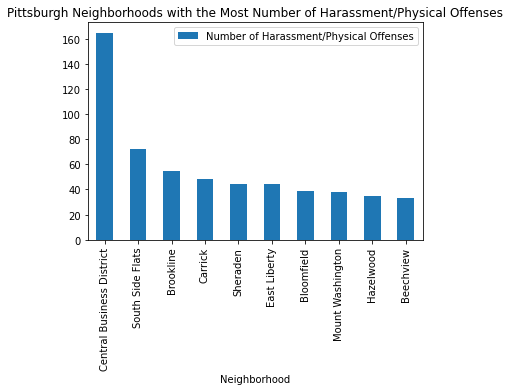

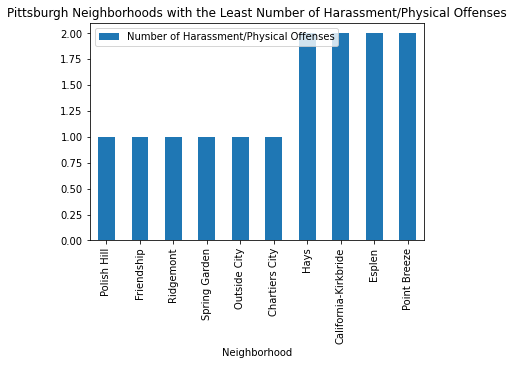

In [30]:
plt = temp3_agg_sorted.iloc[:10].plot(kind='bar', x="Neighborhood", y="Number of Harassment/Physical Offenses", title="Pittsburgh Neighborhoods with the Most Number of Harassment/Physical Offenses")
temp3_agg_sorted_opp=temp3_agg.sort_values("Number of Harassment/Physical Offenses", ascending=True)
plt = temp3_agg_sorted_opp.iloc[:10].plot(kind='bar', x="Neighborhood", y="Number of Harassment/Physical Offenses", title="Pittsburgh Neighborhoods with the Least Number of Harassment/Physical Offenses")

Based on these graphs, we can see that the neighborhood with the most number of harassment/physical offenses to occur is Central Business District, with South Side Flats being second. And the bottom ten neighborhoods for occurences of this citation are ranging from 1-2 instances, starting at Polish Hill with 1.

Overall, the two neighborhoods who appear to be in the top two places for all three analyzed citations are South Side Flats and Central Business District.